In [62]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metri>cs module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

In [63]:
url = 'https://raw.githubusercontent.com/ashokgit/DataSets/main/heart.csv'

In [64]:
col_names = ['age','sex','cp', 'trestbps','chol', 'fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [65]:
pima = pd.read_csv(url, header=None, names=col_names,skiprows=[0])

In [66]:
pima.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
pima.sample(frac=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0


In [68]:
pima = pima.sample(frac=1).reset_index(drop=True)

In [69]:
pima.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
2,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
3,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
4,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


In [70]:
X = pima[col_names]
y = pima.target
X.drop('target', axis=1,inplace=True)

In [71]:
type(X)

pandas.core.frame.DataFrame

In [72]:
type(y)

pandas.core.series.Series

In [73]:
labelEncoder = LabelEncoder()
pima['oldpeak'] = labelEncoder.fit_transform(y=pima['oldpeak'])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 60% training and 40% test

In [75]:
# Create Decision Tree classifer object

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=2, random_state=17 )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [76]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7377049180327869


In [77]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
clf.score(X_test, y_test)

0.7377049180327869

In [79]:
preds = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=preds)

0.7377049180327869

In [80]:
pima.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,9.818482,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,10.335917,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,8.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,16.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,39.000000,2.000000,4.000000,3.000000,1.000000


In [81]:
from matplotlib import pyplot as plt

In [82]:
plt.rcParams['figure.figsize'] = (20,8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3e2e33f28>,
      dtype=object)

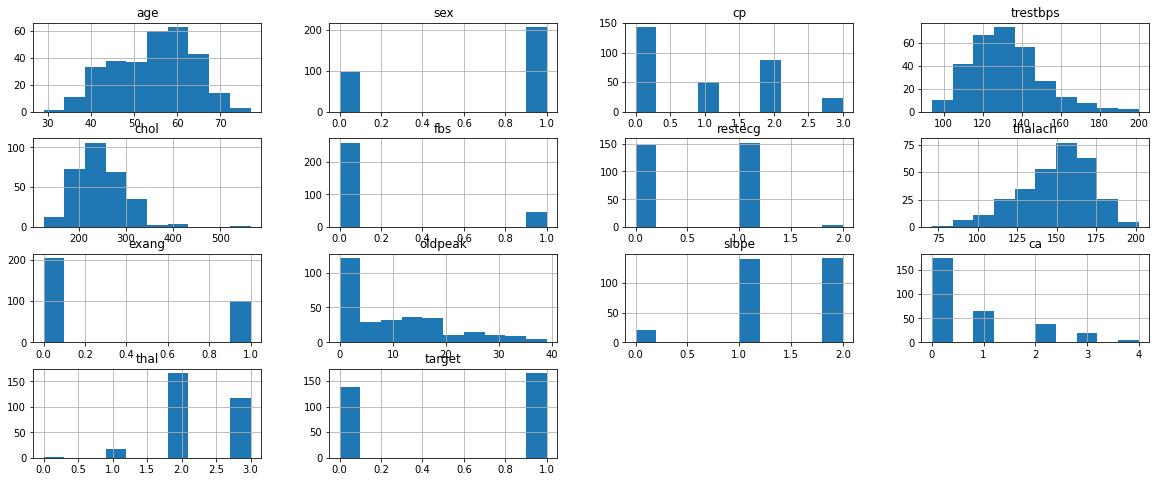

In [83]:
pima.hist()

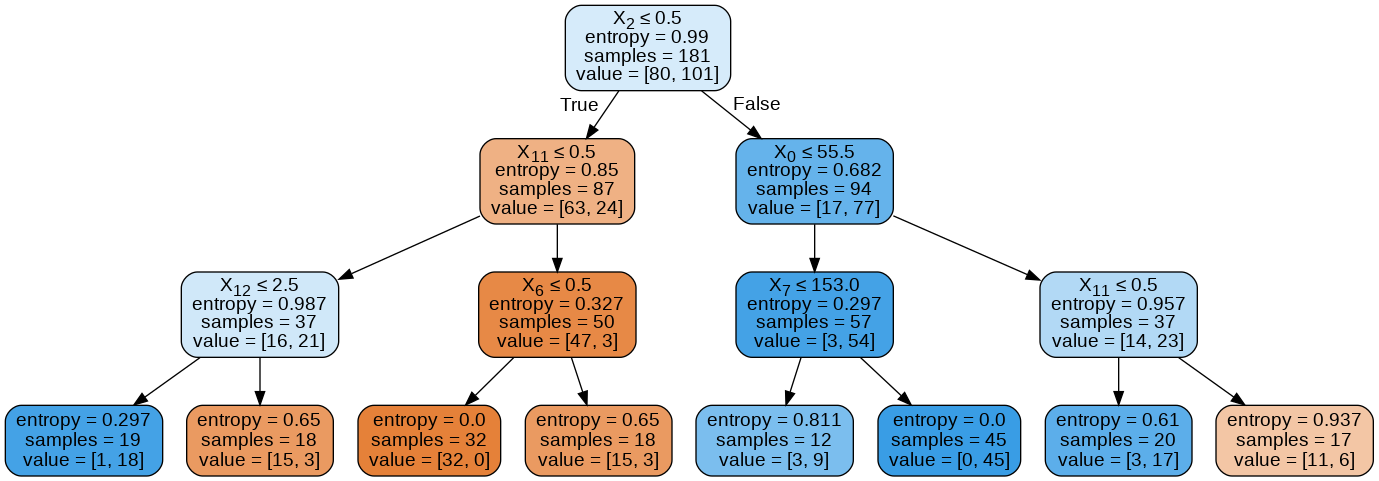

In [84]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_png')
Image(graph.create_png())

In [85]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [92]:
best_parameters = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}
# for information gain and entropy
model = GridSearchCV(estimator=clf, param_grid=best_parameters, n_jobs=-1, verbose=1, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=17))
model.fit(X_train, y_train)
model.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 243 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    0.9s finished


{'max_depth': 3, 'min_samples_leaf': 6}

In [93]:
model.best_score_

0.8620218579234974

In [94]:
preds_2 = model.predict(X_test)

In [95]:
accuracy_score(y_test, preds_2)

0.7377049180327869